### **Prerequisites**

1. **Dot Product Between Two Vectors and Scalar Projection:**
   $$
   \mathbf{a} \cdot \mathbf{b} = \|\mathbf{a}\| \|\mathbf{b}\| \cos \theta = \sum_{i=1}^d a_i b_i
   $$
   Scalar projection of $ \mathbf{a} $ onto $ \mathbf{b} $:
   $$
   \text{Projection} = \frac{\mathbf{a} \cdot \mathbf{b}}{\|\mathbf{b}\|}
   $$ 

2. **Dot Product = Scalar Projection When Projected onto Unit Vector:**
   If $ \|\mathbf{b}\| = 1 $, then:
   $$
   \text{Projection} = \mathbf{a} \cdot \mathbf{b}
   $$ 
   *If either vector is unit vector, dot product equals scalar projection.*

3. **Variance of an Observation Vector If Its Mean Is Zero:**
   $$
   \text{Var}(\mathbf{x}) = \frac{1}{n - 1} \|\mathbf{x}\|^2 = \frac{1}{n - 1} \sum_{i=1}^n x_i^2
   $$ 
   *Variance is the squared norm if the mean is zero.*

---

### **PCA Derivation**

1. **Data Matrix:**
   $$
   X \in \mathbb{R}^{n \times d}
   $$ 
   *Matrix with $n$ data points and $d$ features.*

2. **Mean-Centering:**
   $$
   \mathbf{\mu} = \frac{1}{n} \sum_{i=1}^n \mathbf{x}_i
   $$
   $$
   \tilde{X} = X - \mathbf{1}_n \mathbf{\mu}^T
   $$ 
   *Center data by subtracting the mean.*

3. **Covariance Matrix:**
   $$
   S = \frac{1}{n - 1} \tilde{X}^T \tilde{X}
   $$ 
   *Covariance matrix captures relationships between features.*

4. **Projection onto Unit Vector $ \mathbf{w} $:**
   $$
   \mathbf{z} = \tilde{X} \mathbf{w}
   $$
   Variance of projection:
   $$
   \text{Var}(\tilde{X} \mathbf{w}) = \frac{1}{n - 1} (\tilde{X} \mathbf{w})^T (\tilde{X} \mathbf{w}) = \mathbf{w}^T S \mathbf{w}
   $$ 
   *Projection each row vector along $ \mathbf{w} $ .*

5. **Optimization Problem (Maximize Variance):**
   $$
   \max_{\mathbf{w}} \mathbf{w}^T S \mathbf{w}, \quad \text{subject to } \mathbf{w}^T \mathbf{w} = 1
   $$ 
   *Find the direction $ \mathbf{w} $ that maximizes variance.*

6. **Lagrangian and Gradient Condition:**
   $$
   \mathcal{L}(\mathbf{w}, \lambda) = \mathbf{w}^T S \mathbf{w} - \lambda (\mathbf{w}^T \mathbf{w} - 1)
   $$ 
   Gradient condition:
   $$
   \nabla_{\mathbf{w}} \mathcal{L} = 2S \mathbf{w} - 2\lambda \mathbf{w} = 0
   $$ 
   $$
   S \mathbf{w} = \lambda \mathbf{w}
   $$ 
   *Leads to the eigenvalue problem.*

7. **Principal Components:**
   - Eigenvalue problem:
     $$
     S \mathbf{w} = \lambda \mathbf{w}
     $$ 
   - $ \mathbf{w} $ is the eigenvector corresponding to the largest eigenvalue $ \lambda_1 $.
   *The first principal component (explaining the largest variance) is the eigenvector with the largest eigenvalue.*


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearn_PCA

np.random.seed(20250101)
plt.style.use('dark_background')
%matplotlib inline

In [10]:
# Generate the data matrix
data_matrix = np.random.multivariate_normal(
    mean=[3, 2], cov=[[8, 9], [9, 30]], size=100)

# Standardize data matrix (manual standardization)
data_matrix_standardized = (
    (data_matrix - data_matrix.mean(axis=0)) /
    data_matrix.std(axis=0, ddof=1)
)

# Perform PCA using sklearn
sklearn_pca = sklearn_PCA()
sklearn_pca.fit(data_matrix_standardized)

# Get eigenvalues and eigenvectors from sklearn PCA
sklearn_eigenvals = sklearn_pca.explained_variance_
sklearn_eigenvecs = sklearn_pca.components_.T

# Calculate the covariance matrix manually
covariance_matrix = (data_matrix_standardized.T @ data_matrix_standardized) / (data_matrix.shape[0] - 1)


# Calculate eigenvalues and eigenvectors from manual covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(
    covariance_matrix
)

# Sort eigenvalues and eigenvectors in descending order to match
sorted_indices_sklearn = np.argsort(sklearn_eigenvals)[::-1]
sorted_indices_manual = np.argsort(eigenvalues)[::-1]

# Re-order eigenvectors accordingly
sklearn_eigenvals_sorted = sklearn_eigenvals[sorted_indices_sklearn]
sklearn_eigenvecs_sorted = sklearn_eigenvecs[:, sorted_indices_sklearn]
eigenvalues_sorted = eigenvalues[sorted_indices_manual]
eigenvectors_sorted = eigenvectors[:, sorted_indices_manual]

# Display results
print("Eigenvalues from sklearn:\n", sklearn_eigenvals_sorted)
print("Eigenvalues from manual method:\n", eigenvalues_sorted)

Eigenvalues from sklearn:
 [1.49862507 0.50137493]
Eigenvalues from manual method:
 [1.49862507 0.50137493]


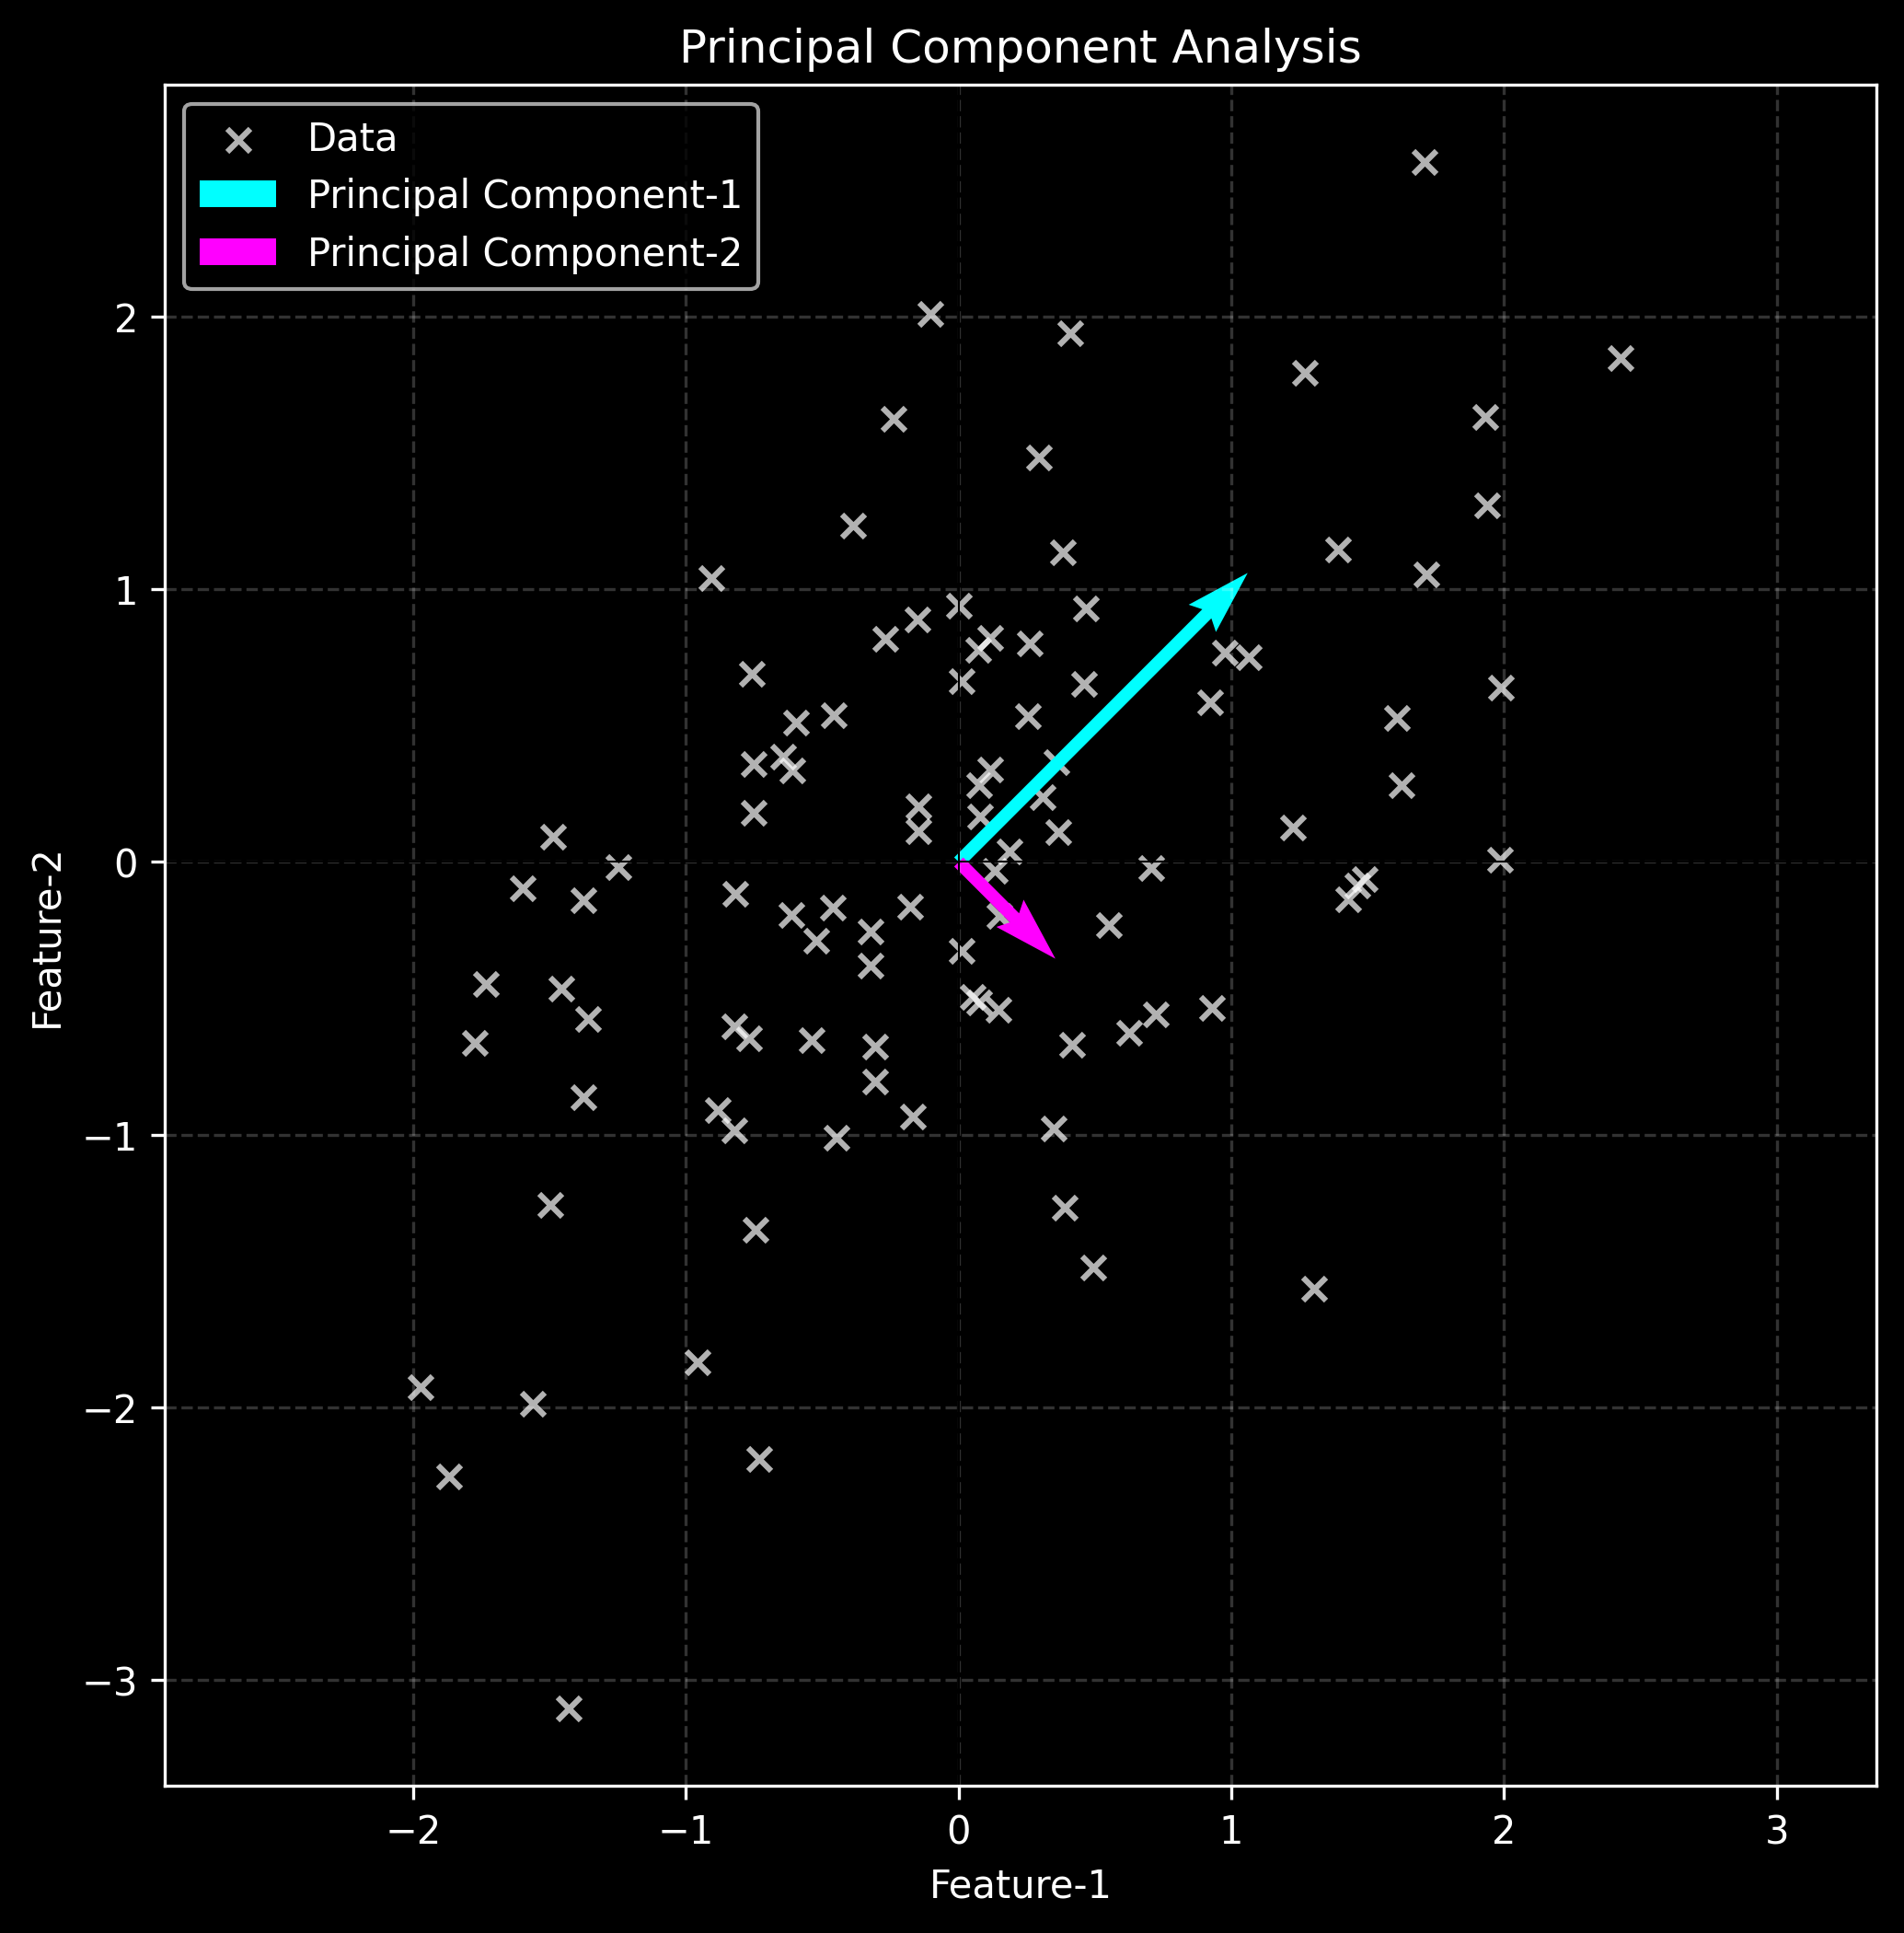

In [11]:
# Visualization: Eigenvectors (PCs) in 2D space (Scatter plot with eigenvectors)
plt.figure(figsize=(8, 8), dpi=300)

# Plot the data points
plt.scatter(data_matrix_standardized[:, 0], data_matrix_standardized[:, 1], alpha=0.7, 
            color='white', label="Data", marker='x')

# Plot the eigenvectors (from sklearn, for example) as arrows
plt.quiver(0, 0, sklearn_eigenvecs_sorted[0, :][0],sklearn_eigenvecs_sorted[0, :][1], 
           color='cyan', label="Principal Component-1", scale=1/sklearn_eigenvals_sorted[0], scale_units='xy')
plt.quiver(0, 0, sklearn_eigenvecs_sorted[1, :][0], sklearn_eigenvecs_sorted[1, :][1], 
           color='magenta', label="Principal Component-2", scale=1/sklearn_eigenvals_sorted[1], scale_units='xy')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Principal Component Analysis')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.legend()
plt.axis('equal')
plt.grid(True, alpha=0.2, linestyle='--')
plt.savefig('pca.png', dpi=300)
plt.show()